# Ruina gracza
Proszę zasymulować proces ruiny gracza z łącznymi kapitałami początkowymi a + b = 100 i p = 1/2.

Z symulacji dla różnych wartości kapitału początkowego a proszę narysować wykresy zależności prawdopodobieństwa ruiny gracza P(ruina A) od a.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def single_game(a_fortune, b_fortune, p):
    while a_fortune > 0 and b_fortune > 0:
        a_status = np.random.uniform(0, 1) < p
        a_fortune += 1 if a_status else -1
        b_fortune += -1 if a_status else 1 
    return a_fortune > 0

In [3]:
def simulation(game_num, a_fortune, b_fortune, p):
    wins = 0
    for i in range(game_num):
        wins += single_game(a_fortune, b_fortune, p)
    return (game_num - wins) / game_num

In [4]:
def calc_avg_probs(game_num, a_init_fortune, b_init_fortune, probs):
    avg_probs= []
    for p in probs:
        avg_probs.append(simulation(game_num, a_init_fortune, b_init_fortune, p))
    return avg_probs

In [5]:
p = 0.5
game_num = 500
a_fortunes = np.arange(1, 100, 2)

In [6]:
results = []
for a_fortune in a_fortunes:
    results.append(simulation(game_num, a_fortune, 100 - a_fortune, p))

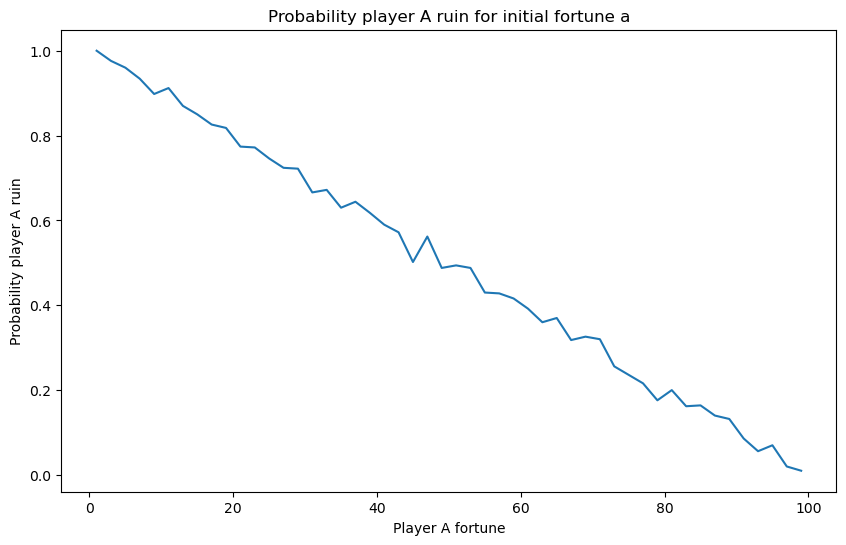

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(a_fortunes, results)
plt.xlabel('Player A fortune')
plt.ylabel('Probability player A ruin')
plt.title(f'Probability player A ruin for initial fortune a')
plt.show()